# 📊 Exploratory Data Analysis (EDA)
This notebook explores the structure and basic patterns in Seoul public bike rental data.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🧹 Data Preprocessing
- Merged 3 CSV files into one using `pandas`
- Renamed columns to English
- Converted datetime columns and extracted year, month, day, hour
- Checked and handled missing values:
  - Removed rows with missing birth year
  - Ignored gender due to ~3% missing
  - Removed rows with 자전거구분

In [ ]:
# Get path of 3 bike data csv files
file1 = '/Users/crunchy__child/seoul-bike-demand/data/raw/seoul_bike_rentals_2306.csv'
file2 = '/Users/crunchy__child/seoul-bike-demand/data/raw/seoul_bike_rentals_2307.csv'
file3 = '/Users/crunchy__child/seoul-bike-demand/data/raw/seoul_bike_rentals_2308.csv'

# Read those data files using pandas
df1 = pd.read_csv(file1, encoding='cp949')
df2 = pd.read_csv(file2, encoding='cp949')
df3 = pd.read_csv(file3, encoding='cp949')

# Merge those files into one
bike_df = pd.concat([df1, df2, df3], ignore_index=True)


# Change the column names to english and store it in dictionary
col_rename_dict = {
    '자전거번호': 'bike_id',
    '대여일시': 'rental_datetime',
    '대여 대여소번호': 'rental_station_id',
    '대여 대여소명': 'rental_station_name',
    '대여거치대': 'rental_dock',
    '반납일시': 'return_datetime',
    '반납대여소번호': 'return_station_id',
    '반납대여소명': 'return_station_name',
    '반납거치대': 'return_dock',
    '이용시간(분)': 'duration_min',
    '이용거리(M)': 'distance_m',
    '생년': 'birth_year',
    '성별': 'gender',
    '이용자종류': 'user_type',
    '대여대여소ID': 'rental_station_code',
    '반납대여소ID': 'return_station_code'
}

# Rename the column
bike_df.rename(columns=col_rename_dict, inplace=True)

# Check the changes
print(bike_df.columns)

In [ ]:
# Check the top 5 rows of data
print(bike_df.head())

In [ ]:
# Data size (Row, Column)
print(bike_df.shape)

# Check the data type
print(bike_df.info())

# Statistically Summary
print(bike_df.describe())

In [ ]:
# Missing value by column
print(bike_df.isnull().sum())


In [ ]:
# Missing value rate by column
print(bike_df.isnull().mean())

# birth_year, gender, 자전거구분 have missing values
# Since 자전거구분 column is only in some files and we don't need the value, we decide to remove the column
if '자전거구분' in bike_df.columns:
    bike_df.drop(columns=['자전거구분'], inplace=True)


In [ ]:
# birth_year missing value rate is 0.00000756% -> remove the row
bike_df = bike_df[bike_df['birth_year'].notnull()]

# gender missing value rate is about 3% -> low rate and we don't need the info in this project, replace "Unkown"
bike_df['gender'] = bike_df['gender'].fillna('Unknown')

# Check
print(bike_df.isnull().sum())


In [66]:
# 1. Convert to datetime (put errors='coerce' to filter weird form)
bike_df['rental_datetime'] = pd.to_datetime(bike_df['rental_datetime'], errors='coerce')
bike_df['return_datetime'] = pd.to_datetime(bike_df['return_datetime'], errors='coerce')

# 2. Drop filtered(NaT) row
bike_df = bike_df.dropna(subset=['rental_datetime', 'return_datetime'])

# 3. Filter the range of date (2023-06-01~2023-08-31)
bike_df = bike_df[(bike_df['rental_datetime'] >= '2023-06-01') & (bike_df['rental_datetime'] <= '2023-08-31')]
bike_df = bike_df[(bike_df['return_datetime'] >= '2023-06-01') & (bike_df['return_datetime'] <= '2023-08-31')]

In [67]:
# Create derived variable

# Derived from date info
bike_df['rental_year'] = bike_df['rental_datetime'].dt.year
bike_df['rental_month'] = bike_df['rental_datetime'].dt.month
bike_df['rental_day'] = bike_df['rental_datetime'].dt.day
bike_df['rental_weekday'] = bike_df['rental_datetime'].dt.day_name()     # 예: Monday
bike_df['rental_hour'] = bike_df['rental_datetime'].dt.hour

# Check is weekend
bike_df['is_weekend'] = bike_df['rental_weekday'].isin(['Saturday', 'Sunday'])

## 📈 Exploratory Data Analysis (EDA)
- Visualized rental trends by:
  - Rental Hour
  - Weekday
  - is weekend

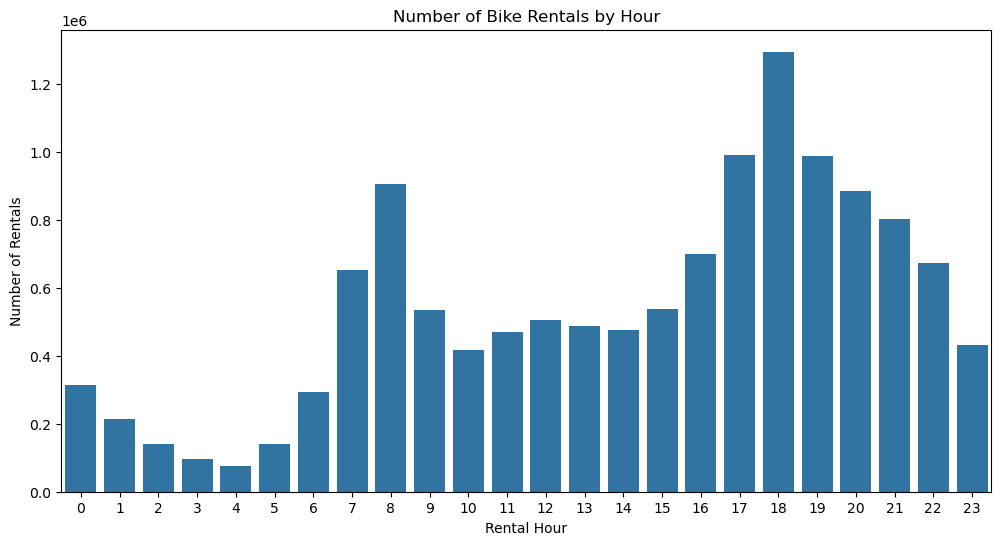

In [ ]:
# Check bike rentals by rental hour

plt.figure(figsize=(12,6))
sns.countplot(data=bike_df, x='rental_hour')
plt.title('Number of Bike Rentals by Hour')
plt.xlabel('Rental Hour')
plt.ylabel('Number of Rentals')
plt.show()

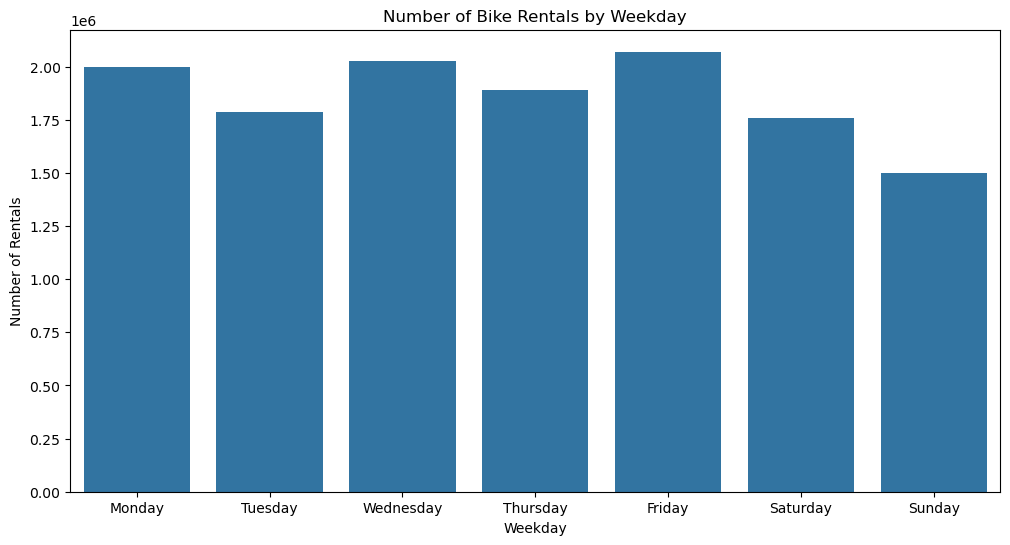

In [69]:
# Check bike rentals by weekday

plt.figure(figsize=(12,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=bike_df, x='rental_weekday', order=order)
plt.title('Number of Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Rentals')
plt.show()

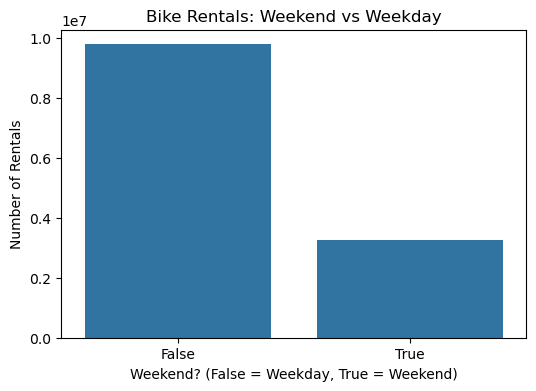

In [70]:
# Check bike rentals by weekend vs weekday

plt.figure(figsize=(6,4))
sns.countplot(data=bike_df, x='is_weekend')
plt.title('Bike Rentals: Weekend vs Weekday')
plt.xlabel('Weekend? (False = Weekday, True = Weekend)')
plt.ylabel('Number of Rentals')
plt.show()

## 💾 Processed Data Save
- Saved merged and cleaned data to `data/processed/merged_bike_data.csv`
- Ignored large ones using `.gitignore`

In [71]:
# Convert merged data to csv file
bike_df.to_csv('/Users/crunchy__child/seoul-bike-demand/data/processed/merged_bike_data.csv', index=False, encoding='utf-8-sig')


In [72]:
print(bike_df.columns)

Index(['bike_id', 'rental_datetime', 'rental_station_id',
       'rental_station_name', 'rental_dock', 'return_datetime',
       'return_station_id', 'return_station_name', 'return_dock',
       'duration_min', 'distance_m', 'birth_year', 'gender', 'user_type',
       'rental_station_code', 'return_station_code', 'rental_year',
       'rental_month', 'rental_day', 'rental_weekday', 'rental_hour',
       'is_weekend'],
      dtype='object')
